In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supersamplestore/SampleSuperstore.csv


#### Import libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Info about the data

In [124]:
df=pd.read_csv("../input/supersamplestore/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [125]:
country=df["Country"].unique()

ship_mode=df["Ship Mode"].unique()

segments=df["Segment"].unique()

cities=df["City"].unique()

States=df["State"].unique()

Region=df["Region"].unique()

category=df["Category"].unique()

sub_category=df["Sub-Category"].unique()

In [126]:
print(country,"\n")
print(ship_mode,"\n")
print(segments,"\n")
#print(cities,"\n")
#print(States)
print(Region,"\n")
print(category,"\n")
print(sub_category,"\n")

['United States'] 

['Second Class' 'Standard Class' 'First Class' 'Same Day'] 

['Consumer' 'Corporate' 'Home Office'] 

['South' 'West' 'Central' 'East'] 

['Furniture' 'Office Supplies' 'Technology'] 

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers'] 



In [127]:
df.shape

(9994, 13)

In [128]:
df.size

129922

### Clean the data if any uncertainities found

In [129]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [130]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [131]:
df.drop("Country",axis=1,inplace=True)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [132]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Make Total Columns

In [133]:
df["Grand Total"]=df["Sales"]*df["Quantity"]-df["Discount"]*(df["Sales"]*df["Quantity"])
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Grand Total
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,523.920000
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2195.820000
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,29.240000
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2633.338125
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,35.788800


In [134]:
df.nunique()

Ship Mode          4
Segment            3
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
Grand Total     6425
dtype: int64

In [138]:
df.groupby(["Category","Sub-Category"])["Sales"].sum()

Category         Sub-Category
Furniture        Bookcases       114879.9963
                 Chairs          328449.1030
                 Furnishings      91705.1640
                 Tables          206965.5320
Office Supplies  Appliances      107532.1610
                 Art              27118.7920
                 Binders         203412.7330
                 Envelopes        16476.4020
                 Fasteners         3024.2800
                 Labels           12486.3120
                 Paper            78479.2060
                 Storage         223843.6080
                 Supplies         46673.5380
Technology       Accessories     167380.3180
                 Copiers         149528.0300
                 Machines        189238.6310
                 Phones          330007.0540
Name: Sales, dtype: float64

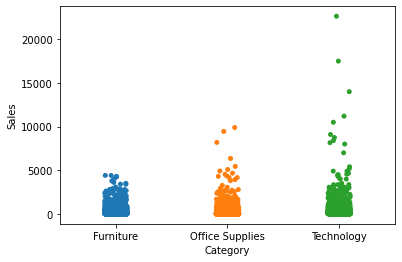

In [136]:

sns.stripplot(df['Category'],df['Sales'])
plt.show()

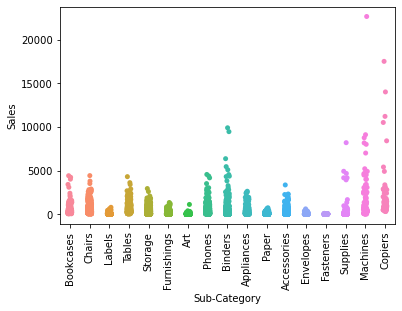

In [144]:

sns.stripplot(df['Sub-Category'],df['Sales'])
plt.xticks(rotation=90)
plt.show()

In [149]:
dis_item=df["Discount"].groupby(df["Sub-Category"]).sum()
dis_item

Sub-Category
Accessories     60.80
Appliances      77.60
Art             59.60
Binders        567.00
Bookcases       48.14
Chairs         105.00
Copiers         11.00
Envelopes       20.40
Fasteners       17.80
Furnishings    132.40
Labels          25.00
Machines        35.20
Paper          102.60
Phones         137.40
Storage         63.20
Supplies        14.60
Tables          83.35
Name: Discount, dtype: float64

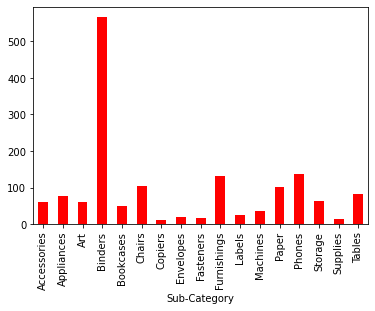

In [160]:
dis_item.plot(kind='bar',color='red')

In [161]:
Items=df.groupby(["Category","Sub-Category"])["Grand Total"].sum()
print(Items)

Category         Sub-Category
Furniture        Bookcases       4.867628e+05
                 Chairs          1.423833e+06
                 Furnishings     4.138196e+05
                 Tables          9.049492e+05
Office Supplies  Appliances      5.122866e+05
                 Art             1.267811e+05
                 Binders         7.927208e+05
                 Envelopes       6.831189e+04
                 Fasteners       1.554579e+04
                 Labels          6.707149e+04
                 Paper           3.634381e+05
                 Storage         1.038756e+06
                 Supplies        1.881576e+05
Technology       Accessories     8.284448e+05
                 Copiers         5.846902e+05
                 Machines        6.909337e+05
                 Phones          1.387681e+06
Name: Grand Total, dtype: float64


### Visualize

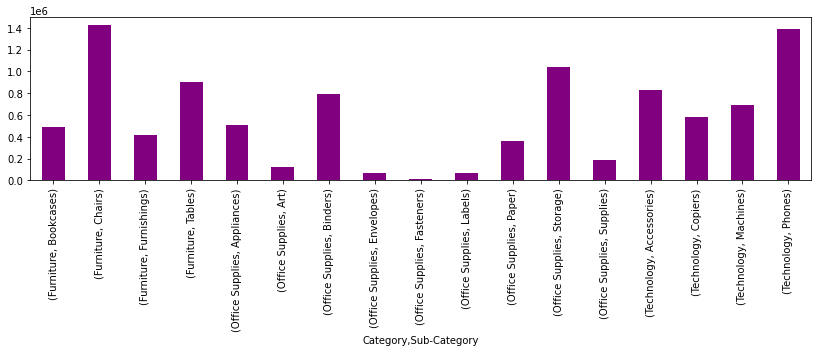

In [163]:
Items=df.groupby(["Category","Sub-Category"])["Grand Total"].sum()
plt.figure(figsize=(14,3))
Items.plot(kind="bar",color='purple')

## Chairs from Furniture and Phones from Technology are sold most

In [166]:
my_prof=df["Profit"].groupby(df["Sub-Category"]).sum()
my_prof

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

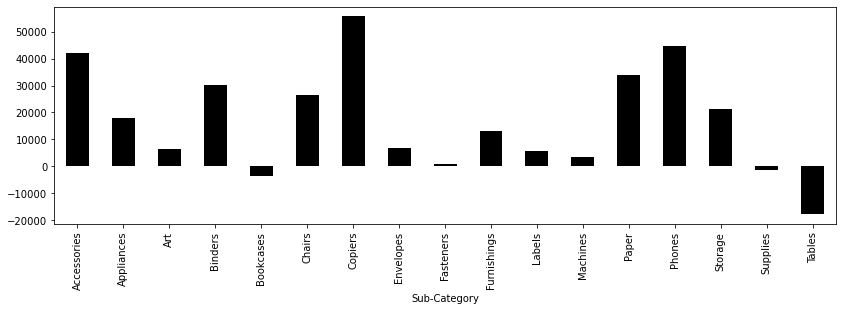

In [171]:
plt.figure(figsize=(14,4))
my_prof.plot(kind='bar',color='black')

## Copiers makes more profit

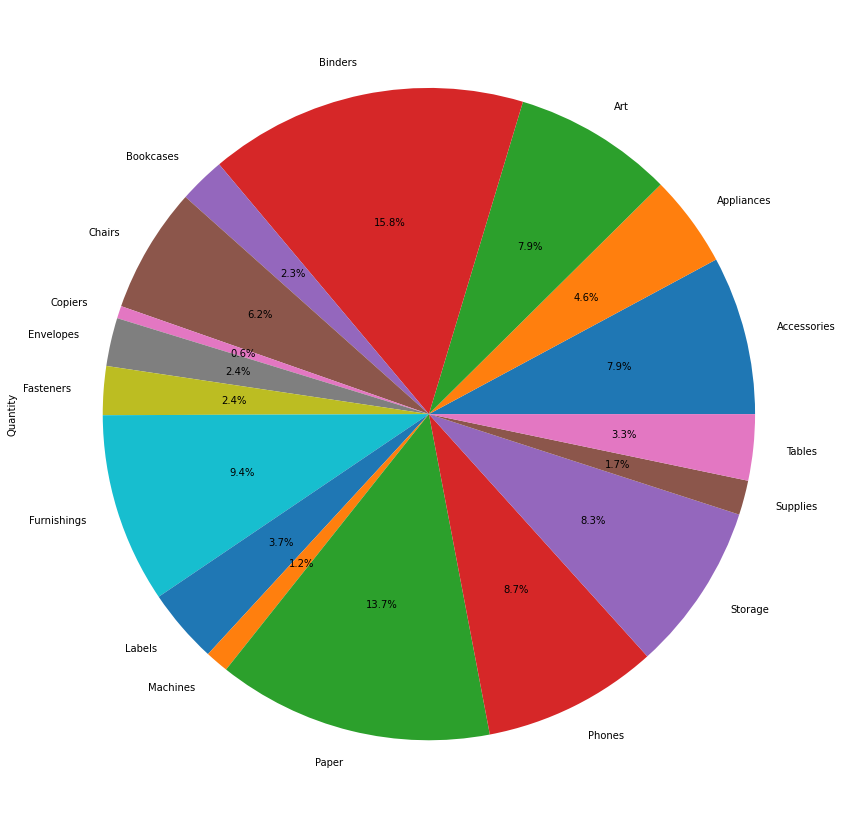

In [175]:
plt.figure(figsize=(15,15))
df.groupby('Sub-Category')['Quantity'].sum().plot(kind='pie',autopct = '%.1f%%')
plt.show()

### See State trends

In [181]:
s_tr=df["Grand Total"].groupby(df["State"]).sum().sort_values()
s_tr
                                               

State
North Dakota            3.687750e+03
South Dakota            3.773340e+03
Wyoming                 5.130035e+03
West Virginia           5.421222e+03
Maine                   7.623990e+03
Kansas                  8.954130e+03
Idaho                   1.336211e+04
District of Columbia    1.572448e+04
New Mexico              2.272916e+04
Montana                 2.356656e+04
Iowa                    2.625554e+04
Louisiana               3.800765e+04
Nebraska                3.992569e+04
New Hampshire           4.087670e+04
South Carolina          4.262677e+04
Arkansas                4.989575e+04
Utah                    4.998262e+04
Vermont                 5.462585e+04
Connecticut             5.887215e+04
Mississippi             5.927736e+04
Oregon                  5.947451e+04
Nevada                  7.543276e+04
Oklahoma                9.810983e+04
Colorado                1.004953e+05
Tennessee               1.035053e+05
Maryland                1.085845e+05
Missouri                1.120449

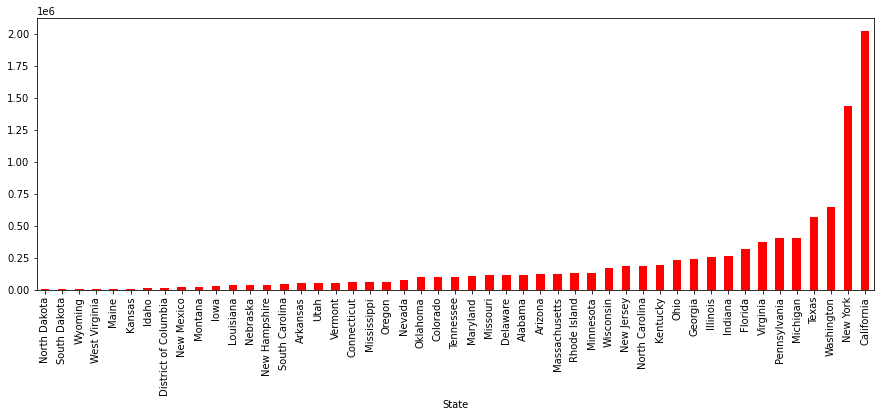

In [182]:
plt.figure(figsize=(15,5))
s_tr.plot(kind='bar',color='red')

In [184]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Grand Total
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,523.920000
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2195.820000
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,29.240000
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,2633.338125
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,35.788800


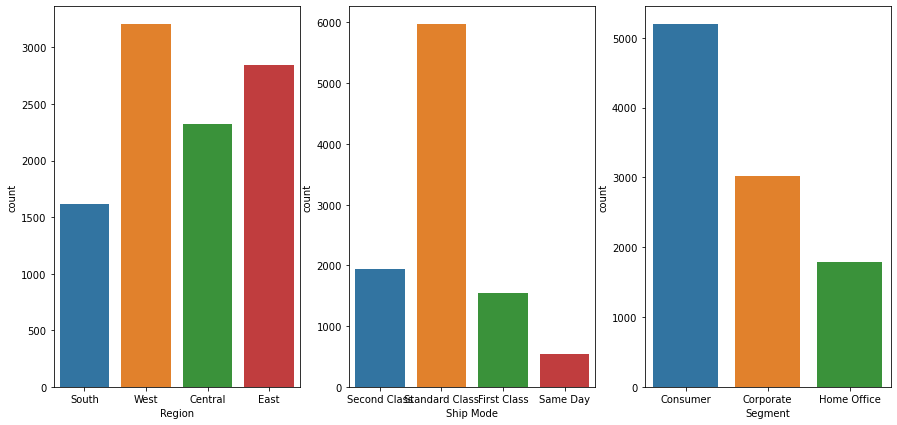

In [192]:
fig,axes = plt.subplots(1,3,figsize=(18,7))
sns.countplot(df['Region'],ax=axes[0])
sns.countplot(df['Ship Mode'],ax=axes[1])
sns.countplot(df['Segment'],ax=axes[2])
plt.show()